In [ ]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"


📂 Enter image path (or type 'exit' to quit):  food.jpg


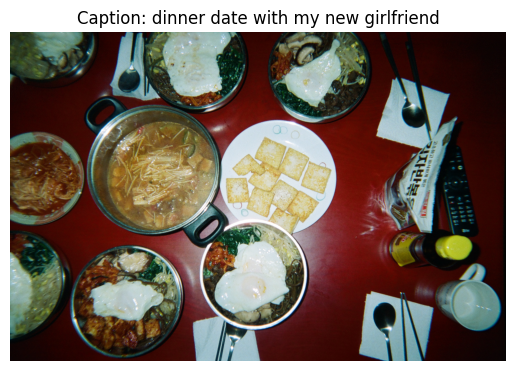


📂 Enter image path (or type 'exit' to quit):  friends.jpg


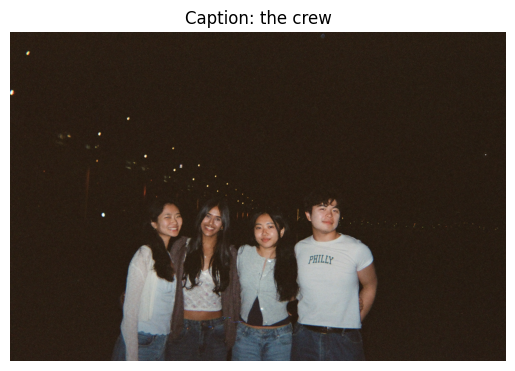


📂 Enter image path (or type 'exit' to quit):  namsan.jpg


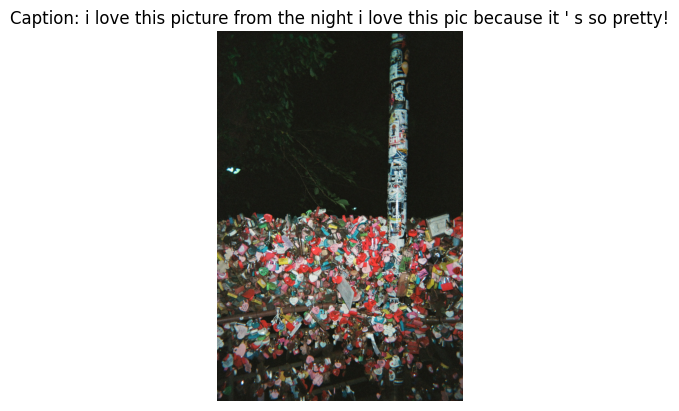


📂 Enter image path (or type 'exit' to quit):  poit.jpg


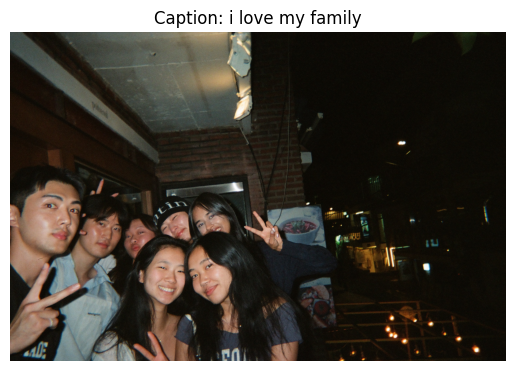


📂 Enter image path (or type 'exit' to quit):  Scenic.jpg


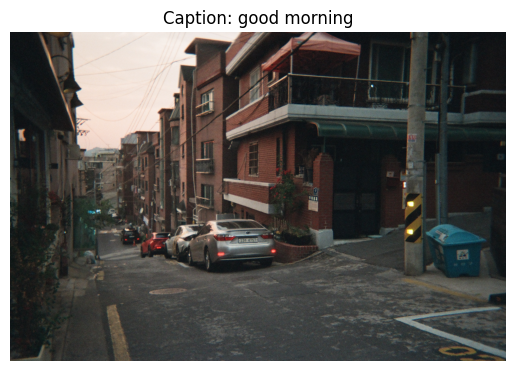


📂 Enter image path (or type 'exit' to quit):  XLB.jpg


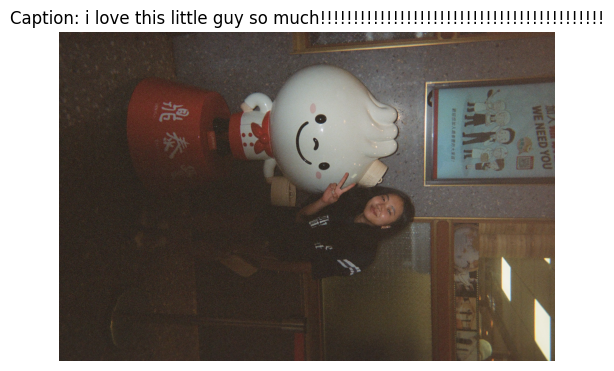


📂 Enter image path (or type 'exit' to quit):  exit


👋 Exiting captioning tool.


In [ ]:
import matplotlib.pyplot as plt
def make_caption(image_path):
    caption_model = BlipForConditionalGeneration.from_pretrained("mle1/instagram_caption_blip",use_safetensors=True).to(device)
    caption_processor = BlipProcessor.from_pretrained("mle1/instagram_caption_blip")

    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"❌ Error opening image: {e}")
        return

    inputs = caption_processor(image, return_tensors="pt").to(device)
    out = caption_model.generate(**inputs, max_new_tokens=50)
    caption = caption_processor.decode(out[0], skip_special_tokens=True)

    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Caption: {caption}", fontsize=12)
    plt.show()


while True:
    path = input("\n📂 Enter image path (or type 'exit' to quit): ").strip()
    if path.lower() == "exit":
        print("👋 Exiting captioning tool.")
        break
    make_caption(path)